## Masukan Library


In [1]:
import pandas as pd
import numpy as np

# masukan library visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk analisis time series
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# library yang digunakan untuk forecasting
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

## memanggil dataset

In [2]:
df = pd.read_excel('CO2 dataset.xlsx')


## deskripsi dataset

In [3]:
df.head()

,Year,CO2
0,1800,0.00568
1,1801,0.00561
2,1802,0.00555
3,1803,0.00548
4,1804,0.00542


In [4]:
df.info() # melihat atribut yang kita panggil

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    215 non-null    int64  
 1   CO2     215 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.5 KB


## transform data

In [5]:
df['year'] = pd.to_datetime(df['Year'], format='%Y') # mengubah colom tahun ke dalam bentuk datetime


In [6]:
df.set_index(['year'], inplace=True) # mengubah index menjadi datetime

In [7]:
df.head()

,Year,CO2
year,,
1800-01-01,1800,0.00568
1801-01-01,1801,0.00561
1802-01-01,1802,0.00555
1803-01-01,1803,0.00548
1804-01-01,1804,0.00542


In [8]:
df.index.min(), df.index.max() # melihat tahun minimal/awal dan maksimal tahun nya

(Timestamp('1800-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

In [9]:
if (df.index.max() - df.index.min() == 214): # melihat apakah data tahun nya continue 
    print('Data Is Continous')


In [10]:
df.index.freq = 'YS' # untuk setting data frekuensi pertahun

## analisa time series

<Axes: xlabel='year'>

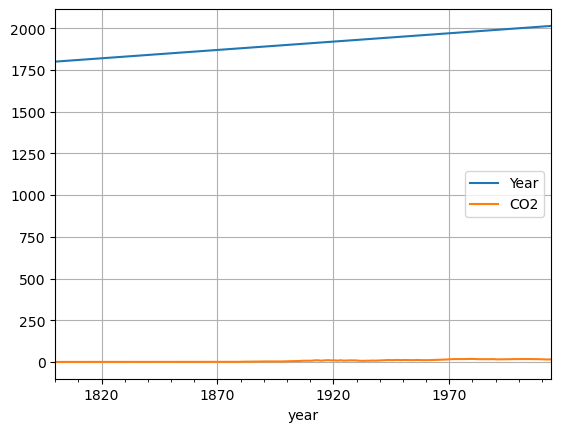

In [11]:
df.plot(grid=True) # melihat plot data

In [12]:
train_df = df.loc[:'1991-01-01'] # membagi data menjadi train dan test untuk mengecek data nya sasioner atau tidak
test_df = df.loc['1992-01-01':] 

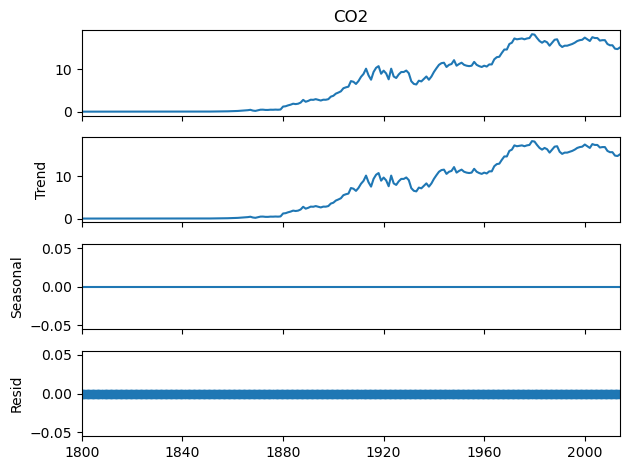

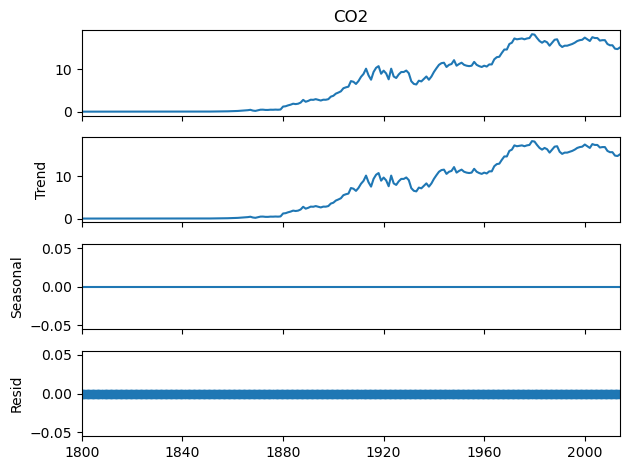

In [13]:
dcompose_add = seasonal_decompose(df['CO2'])
dcompose_add.plot()

In [14]:
print(df.columns)


Index(['Year', 'CO2'], dtype='object')


In [15]:
def adf_test(timeseries):
    print('Hasil dari testing Dickey-Fuller')
    print('--------------------------------')
    adftest = adfuller(timeseries)
    adf_output = pd.Series(adftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, Value in adftest[4].items():
        adf_output['Critical Value (%s)' %key] = Value
    print(adf_output)

# Ganti 'value' dengan nama kolom yang sesuai
adf_test(df['CO2']) 

Hasil dari testing Dickey-Fuller
--------------------------------
Test Statistic                  -0.378463
p-value                          0.913633
Lags Used                        0.000000
Number of Observations Used    214.000000
Critical Value (1%)             -3.461282
Critical Value (5%)             -2.875143
Critical Value (10%)            -2.574020
dtype: float64


In [16]:
diff_df = df.diff()
diff_df.head()

,Year,CO2
year,,
1800-01-01,NaN,NaN
1801-01-01,1.0,-0.00007
1802-01-01,1.0,-0.00006
1803-01-01,1.0,-0.00007
1804-01-01,1.0,-0.00006


In [17]:
diff_df.dropna(inplace=True)

<Axes: xlabel='year'>

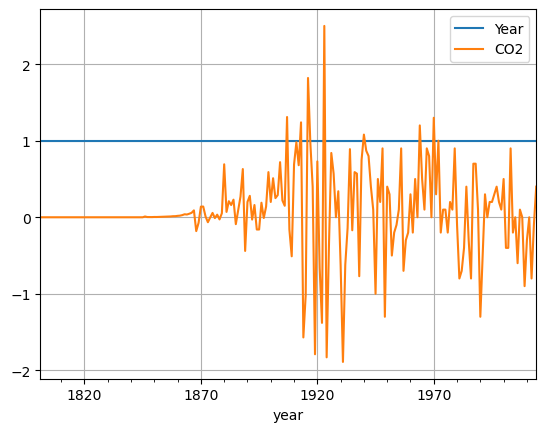

In [18]:
diff_df.plot(grid=True)

In [19]:
adf_test(diff_df['CO2'])

Hasil dari testing Dickey-Fuller
--------------------------------
Test Statistic                  -3.780005
p-value                          0.003119
Lags Used                       15.000000
Number of Observations Used    198.000000
Critical Value (1%)             -3.463815
Critical Value (5%)             -2.876251
Critical Value (10%)            -2.574611
dtype: float64


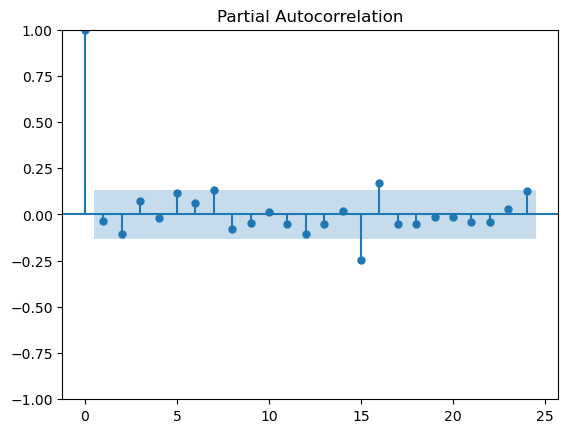

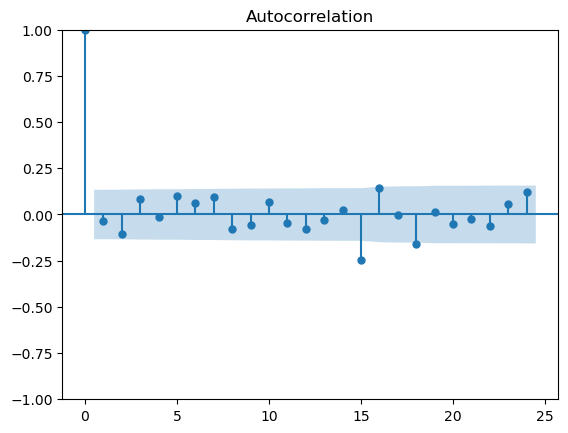

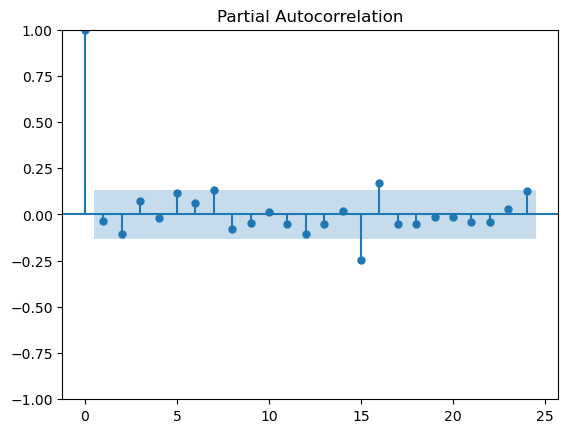

In [20]:
plot_acf(diff_df['CO2'])
plot_pacf(diff_df['CO2']) 

## Single Exponential Smoothing



In [21]:
print(train_df.columns)


Index(['Year', 'CO2'], dtype='object')


In [22]:
single_exp = SimpleExpSmoothing(train_df["CO2"]).fit()
single_exp_train_pred = single_exp.fittedvalues
single_exp_test_pred = single_exp.forecast(23)


<Axes: xlabel='year'>

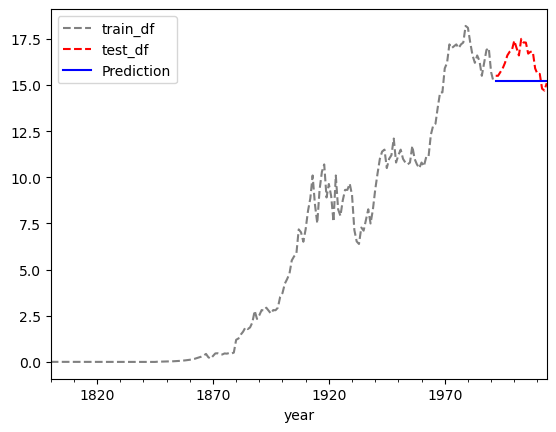

In [23]:
train_df["CO2"].plot(style='--', color='gray', legend=True, label='train_df')
test_df["CO2"].plot(style='--', color='red', legend=True, label='test_df') 
single_exp_test_pred.plot(color='blue', legend=True, label='Prediction')

In [24]:
print('Train RMSE :', mean_squared_error(train_df["CO2"], single_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df["CO2"], single_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df["CO2"], single_exp_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df["CO2"], single_exp_test_pred))

Train RMSE : 0.5646920026800497
Test RMSE : 1.3429113036188507
Train MAPE : 0.08470457285825106
Test MAPE : 0.06861466419628082


## Double Exponential Smoothing


In [ ]:
double_exp = ExponentialSmoothing(train_df["CO2"], trend=None, initialization_method='heuristic',
                                seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_train_pred = double_exp.fittedvalues
double_exp_test_pred = double_exp.forecast(23)

<Axes: xlabel='year'>

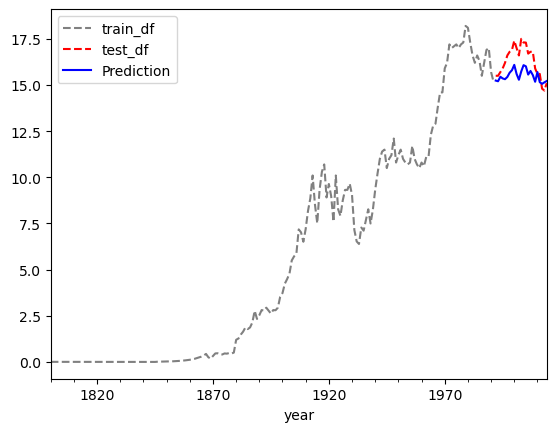

In [26]:
train_df["CO2"].plot(style='--', color='gray', legend=True, label='train_df')
test_df["CO2"].plot(style='--', color='red', legend=True, label='test_df') 
double_exp_test_pred.plot(color='blue', legend=True, label='Prediction')


In [27]:
print('Train RMSE :', mean_squared_error(train_df["CO2"], double_exp_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df["CO2"], double_exp_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df["CO2"], double_exp_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df["CO2"], double_exp_test_pred))

Train RMSE : 0.5576263311585953
Test RMSE : 0.9739218098619987
Train MAPE : 14.722686120005685
Test MAPE : 0.0507815676242888


## Arima


In [51]:
ar = ARIMA(train_df["CO2"], order=(15,1,15)).fit()
ar_train_pred = ar.fittedvalues
ar_test_pred = ar.forecast(23)

c:\Users\Lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='year'>

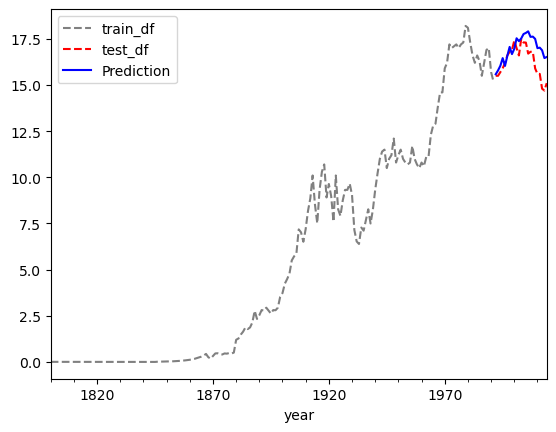

In [47]:
train_df["CO2"].plot(style='--', color='gray', legend=True, label='train_df')
test_df["CO2"].plot(style='--', color='red', legend=True, label='test_df') 
ar_test_pred.plot(color='blue', legend=True, label='Prediction')

In [48]:
print('Train RMSE :', mean_squared_error(train_df["CO2"], ar_train_pred)**0.5)
print('Test RMSE :', mean_squared_error(test_df["CO2"], ar_test_pred)**0.5)
print('Train MAPE :', mean_absolute_percentage_error(train_df["CO2"], ar_train_pred))
print('Test MAPE :', mean_absolute_percentage_error(test_df["CO2"], ar_test_pred))

Train RMSE : 0.46780963056791797
Test RMSE : 0.9549035183910932
Train MAPE : 0.08144828764435211
Test MAPE : 0.04727680191585914


## Perbandingan Algoritma

In [49]:
comparison_df = pd.DataFrame(data=[
    ['Single Exponential Smoothing', 1.3429113036188507,  0.06861466419628082],
    ['Double Exponential Smoothing', 0.9739218098619987, 0.0507815676242888],
    ['ARIMA', 0.9549035183910932, 0.04727680191585914]
    ],
    columns=['Model', 'RMSE', 'MAPE'])
comparison_df.set_index('Model', inplace=True)

In [32]:
comparison_df.sort_values(by='RMSE')

,RMSE,MAPE
Model,,
ARIMA,0.954904,0.047277
Double Exponential Smoothing,0.973922,0.050782
Single Exponential Smoothing,1.342911,0.068615


In [56]:
double_exp = ExponentialSmoothing(df["CO2"], trend=None, initialization_method='heuristic',
                                seasonal='add', seasonal_periods=29, damped_trend=False).fit()
double_exp_pred = double_exp.forecast(20)

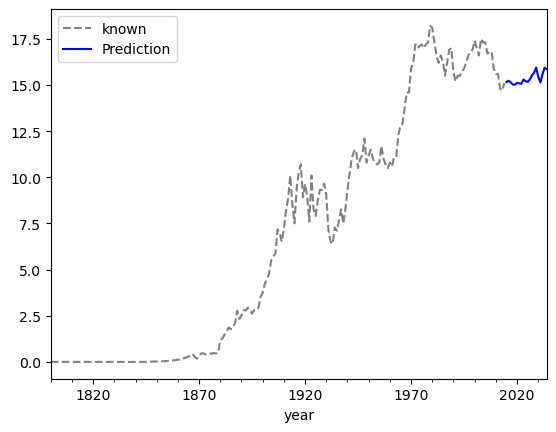

In [57]:
df['CO2'].plot(style='--', color='gray', legend=True, label='known')
double_exp_pred.plot(color='blue', legend=True, label='Prediction')
plt.show()

In [58]:
import pickle

In [59]:
pickle.dump(double_exp, open('prediksi_co2.sav','wb')) 